In [1]:
!sudo apt update -y
!pip install nltk
!pip install gensim
!sudo apt-get install default-jre -y

Get:1 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic InRelease [242 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Get:4 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [74.6 kB]
Get:5 http://security.ubuntu.com/ubuntu bionic-security/main amd64 Packages [739 kB]
Get:6 http://archive.ubuntu.com/ubuntu bionic/main amd64 Packages [1,344 kB]   
Get:7 http://security.ubuntu.com/ubuntu bionic-security/multiverse amd64 Packages [6,508 B]3m
Get:8 http://security.ubuntu.com/ubuntu bionic-security/universe amd64 Packages [791 kB]
Get:9 http://security.ubuntu.com/ubuntu bionic-security/restricted amd64 Packages [16.8 kB]3m
Get:10 http://archive.ubuntu.com/ubuntu bionic/restricted amd64 Packages [13.5 kB]m
Get:11 http://archive.ubuntu.com/ubuntu bionic/multiverse amd64 Packages [186 kB]
Get:12 http://archive.ubuntu.com/ubuntu bionic/universe amd64 Packages [11.3 MB]
Get:13 http://archiv

Get:5 http://archive.ubuntu.com/ubuntu bionic/main amd64 libxtst6 amd64 2:1.2.3-1 [12.8 kB]
Get:6 http://archive.ubuntu.com/ubuntu bionic-updates/main amd64 openjdk-11-jre-headless amd64 11.0.4+11-1ubuntu2~18.04.3 [37.4 MB]
Get:7 http://archive.ubuntu.com/ubuntu bionic-updates/main amd64 default-jre-headless amd64 2:1.11-68ubuntu1~18.04.1 [10.9 kB]
Get:8 http://archive.ubuntu.com/ubuntu bionic-updates/main amd64 ca-certificates-java all 20180516ubuntu1~18.04.1 [12.2 kB]
Get:9 http://archive.ubuntu.com/ubuntu bionic-updates/main amd64 openjdk-11-jre amd64 11.0.4+11-1ubuntu2~18.04.3 [34.4 kB]
Get:10 http://archive.ubuntu.com/ubuntu bionic-updates/main amd64 default-jre amd64 2:1.11-68ubuntu1~18.04.1 [1,076 B]
Get:11 http://archive.ubuntu.com/ubuntu bionic/main amd64 libfontenc1 amd64 1:1.1.3-1 [13.9 kB]
Get:12 http://archive.ubuntu.com/ubuntu bionic/main amd64 x11-utils amd64 7.7+3build1 [196 kB]
Get:13 http://archive.ubuntu.com/ubuntu bionic/main amd64 libatk-wrapper-java all 0.33.3-20u

Adding debian:Starfield_Class_2_CA.pem
Adding debian:Chambers_of_Commerce_Root_-_2008.pem
Adding debian:COMODO_Certification_Authority.pem
Adding debian:OpenTrust_Root_CA_G2.pem
Adding debian:GeoTrust_Universal_CA_2.pem
Adding debian:Visa_eCommerce_Root.pem
Adding debian:ePKI_Root_Certification_Authority.pem
Adding debian:Starfield_Root_Certificate_Authority_-_G2.pem
Adding debian:TeliaSonera_Root_CA_v1.pem
Adding debian:USERTrust_RSA_Certification_Authority.pem
Adding debian:TrustCor_RootCert_CA-2.pem
Adding debian:GeoTrust_Universal_CA.pem
Adding debian:D-TRUST_Root_Class_3_CA_2_2009.pem
Adding debian:DigiCert_Assured_ID_Root_CA.pem
Adding debian:Hellenic_Academic_and_Research_Institutions_ECC_RootCA_2015.pem
Adding debian:D-TRUST_Root_Class_3_CA_2_EV_2009.pem
Adding debian:TrustCor_ECA-1.pem
Adding debian:TrustCor_RootCert_CA-1.pem
Adding debian:Entrust_Root_Certification_Authority_-_G2.pem
Adding debian:Security_Communication_RootCA2.pem
Adding debian:Hellenic_Academic_and_Research

In [2]:
import pandas as pd
import numpy as np
import pickle
from os import path
import re
import nltk
import gensim
import time
import matplotlib.pyplot as plt
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /home/jovyan/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /home/jovyan/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [3]:
with open(path.expanduser('~/work/data/talk_meta.pkl'), "rb") as input_file:
    talk_meta = pickle.load(input_file)
    
with open(path.expanduser('~/work/data/talk_sub.pkl'), "rb") as input_file:
    talk_sub = pickle.load(input_file)

In [4]:
talk_meta

,name,tags,talk_id
0,Al Gore: Averting the climate crisis,"alternative energy,cars,climate change,culture...",1.0
1,Amy Smith: Simple designs to save a life,"MacArthur grant,alternative energy,design,engi...",2.0
2,Ashraf Ghani: How to rebuild a broken state,"business,corruption,culture,economics,entrepre...",3.0
3,Burt Rutan: The real future of space exploration,"NASA,aircraft,business,design,engineering,entr...",4.0
4,Chris Bangle: Great cars are great art,"art,business,cars,design,industrial design,inv...",5.0
...,...,...,...
2555,Niti Bhan: The hidden opportunities of the inf...,"Africa,business,creativity,culture,economics,i...",3642.0
2556,Matilda Ho: The future of good food in China,"TED Fellows,agriculture,china,entrepreneur,far...",3671.0
2557,Gretchen Carlson: How we can end sexual harass...,"activism,journalism,law,leadership,personal gr...",3680.0
2558,Dan Gartenberg: The brain benefits of deep sle...,"Human body,TED Residency,brain,health,memory,s...",3686.0


In [5]:
talk_sub.groupby('talk_id').count().sort_values('transcript')

,id,transcript
talk_id,,
1415.0,1,1
1619.0,1,1
1792.0,1,1
1793.0,1,1
1794.0,1,1
...,...,...
2010.0,216,216
254.0,221,221
2209.0,231,231


In [6]:
def prepare_text(text):
    text = re.sub(r'\((.*?)\)', ' ', text)
    text = re.sub(r'\d+', '', text)
    text = nltk.tokenize.RegexpTokenizer(r'\w+').tokenize(text.lower())
    text = [w for w in text if not(w in nltk.corpus.stopwords.words('english'))]
    text = [nltk.corpus.wordnet.morphy(w) if nltk.corpus.wordnet.morphy(w) else w for w in text]
    return text

In [7]:
def remove_extra_stopwords(text, extra_keywords):
    text = text.split()
    text = [w for w in text if not(w in extra_keywords)]
    return text

In [ ]:
extra_keywords = []
talk_pre = talk_sub.copy()
talk_pre['transcript'] = talk_pre['transcript'].apply(lambda x: prepare_text(x))
talk_pre['transcript'] = talk_pre['transcript'].apply(lambda x: ' '.join(x))

In [20]:
with open(path.expanduser('~/work/data/talk_pre.pkl'), 'wb') as output:
    pickle.dump(talk_pre, output, pickle.HIGHEST_PROTOCOL)

In [8]:
with open(path.expanduser('~/work/data/talk_pre.pkl'), "rb") as input_file:
    talk_pre = pickle.load(input_file)

In [23]:
data_words = talk_pre['transcript'].apply(lambda x: x.split()).values

id2word = gensim.corpora.Dictionary(data_words)

corpus = [id2word.doc2bow(text) for text in data_words]

In [9]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        start = time.time()
        mallet_path = path.expanduser('~/work/jupyter_notebooks/notebooks/mallet-2.0.8/bin/mallet')
        model = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=num_topics, id2word=id2word, random_seed = 1)
        dur = time.time() - start
        print("Time Elapsed",dur,'s')
        model_list.append(model)
        coherencemodel = gensim.models.CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())
        print('No. Topics ', num_topics,' - Coherence ',coherencemodel.get_coherence())

    return model_list, coherence_values

In [10]:
limit=101; start=10; step=10;
# Can take a long time to run.
model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=data_words, start=start, limit=limit, step=step)

Time Elapsed 148.09888577461243 s
No. Topics  10  - Coherence  0.4797990738968513
Time Elapsed 159.04448628425598 s
No. Topics  20  - Coherence  0.4900418766942168
Time Elapsed 167.8969841003418 s
No. Topics  30  - Coherence  0.493779255816099
Time Elapsed 179.7405707836151 s
No. Topics  40  - Coherence  0.4951702726130711
Time Elapsed 191.1104075908661 s
No. Topics  50  - Coherence  0.49300066142004995
Time Elapsed 197.41050267219543 s
No. Topics  60  - Coherence  0.48388753307282756
Time Elapsed 230.64750146865845 s
No. Topics  70  - Coherence  0.4826582007096317
Time Elapsed 249.02568221092224 s
No. Topics  80  - Coherence  0.46784457604323526
Time Elapsed 258.7740867137909 s
No. Topics  90  - Coherence  0.4594748900074516
Time Elapsed 244.2577829360962 s
No. Topics  100  - Coherence  0.45728410046430384


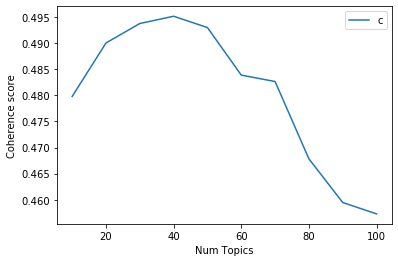

In [11]:
# Show graph

x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [11]:
num_topics = 40
start = time.time()
mallet_path = path.expanduser('~/work/jupyter_notebooks/notebooks/mallet-2.0.8/bin/mallet') # update this path
# prefix = path.expanduser('~/work/jupyter_notebooks/notebooks/mallet-dep/')
model = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=num_topics, id2word=id2word, random_seed = 1)

dur = time.time() - start

print("Time Elapsed",dur,'s')

coherence_model_ldamallet = gensim.models.CoherenceModel(model=model, texts=data_words, dictionary=id2word, coherence='c_v')
coherence_ldamallet = coherence_model_ldamallet.get_coherence()
print('\nCoherence Score: ', coherence_ldamallet, '\n\n')

coherence_ldamallet_per_topic = coherence_model_ldamallet.get_coherence_per_topic()
# Show Topics
for i in np.argsort(coherence_ldamallet_per_topic):
    print('Topic', i, '- Coherence', coherence_ldamallet_per_topic[i], '\n' ,model.print_topic(i, topn=10),'\n')

Time Elapsed 230.36897015571594 s

Coherence Score:  0.4951702726130711 


Topic 39 - Coherence 0.3353837676931726 
 0.102*"story" + 0.059*"world" + 0.042*"part" + 0.033*"share" + 0.024*"end" + 0.020*"history" + 0.020*"sense" + 0.018*"truth" + 0.018*"common" + 0.017*"means" 

Topic 13 - Coherence 0.37849767578522653 
 0.055*"guy" + 0.051*"great" + 0.033*"talk" + 0.029*"yeah" + 0.026*"give" + 0.024*"ted" + 0.021*"ca" + 0.020*"call" + 0.020*"good" + 0.016*"thing" 

Topic 4 - Coherence 0.3910182295688517 
 0.462*"people" + 0.064*"talk" + 0.048*"lot" + 0.043*"person" + 0.033*"talking" + 0.030*"give" + 0.015*"conversation" + 0.015*"important" + 0.013*"reason" + 0.010*"worry" 

Topic 25 - Coherence 0.3955448179908278 
 0.069*"find" + 0.063*"back" + 0.063*"place" + 0.036*"found" + 0.031*"call" + 0.029*"turn" + 0.028*"start" + 0.026*"thing" + 0.025*"break" + 0.025*"coming" 

Topic 3 - Coherence 0.4033284933665217 
 0.062*"hear" + 0.042*"sound" + 0.028*"time" + 0.024*"voice" + 0.021*"call" + 0.

In [10]:
def format_topics_sentences(ldamodel, corpus, texts):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row in enumerate(ldamodel[corpus]):
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)

In [ ]:
df_topic_sents_keywords = format_topics_sentences(ldamodel=model, corpus=corpus, texts=talk_pre['transcript'].values)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']

# Show
df_dominant_topic.head(10)

In [ ]:
# Group top 5 sentences under each topic
sent_topics_sorteddf_mallet = pd.DataFrame()

sent_topics_outdf_grpd = df_topic_sents_keywords.groupby('Dominant_Topic')

for i, grp in sent_topics_outdf_grpd:
    sent_topics_sorteddf_mallet = pd.concat([sent_topics_sorteddf_mallet, 
                                             grp.sort_values(['Perc_Contribution'], ascending=[0]).head(1)], 
                                            axis=0)

# Reset Index    
sent_topics_sorteddf_mallet.reset_index(drop=True, inplace=True)

# Format
sent_topics_sorteddf_mallet.columns = ['Topic_Num', "Topic_Perc_Contrib", "Keywords", "Text"]

# Show
sent_topics_sorteddf_mallet

In [ ]:
# Number of Documents for Each Topic
topic_counts = df_topic_sents_keywords['Dominant_Topic'].value_counts()

# Percentage of Documents for Each Topic
topic_contribution = round(topic_counts/topic_counts.sum(), 4)

# Topic Number and Keywords
topic_num_keywords = df_topic_sents_keywords[['Dominant_Topic', 'Topic_Keywords']]

# Concatenate Column wise
df_dominant_topics = pd.concat([topic_num_keywords, topic_counts, topic_contribution], axis=1)

# Change Column names
df_dominant_topics.columns = ['Dominant_Topic', 'Topic_Keywords', 'Num_Documents', 'Perc_Documents']

# Show
df_dominant_topics

In [12]:
num_topics = 39
start = time.time()
mallet_path = path.expanduser('~/work/jupyter_notebooks/notebooks/mallet-2.0.8/bin/mallet') # update this path
# prefix = path.expanduser('~/work/jupyter_notebooks/notebooks/mallet-dep/')
model = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=num_topics, id2word=id2word, random_seed = 1)

dur = time.time() - start

print("Time Elapsed",dur,'s')

coherence_model_ldamallet = gensim.models.CoherenceModel(model=model, texts=data_words, dictionary=id2word, coherence='c_v')
coherence_ldamallet = coherence_model_ldamallet.get_coherence()
print('\nCoherence Score: ', coherence_ldamallet, '\n\n')

coherence_ldamallet_per_topic = coherence_model_ldamallet.get_coherence_per_topic()
# Show Topics
for i in np.argsort(coherence_ldamallet_per_topic):
    print('Topic', i, '- Coherence', coherence_ldamallet_per_topic[i], '\n' ,model.print_topic(i, topn=10),'\n')

Time Elapsed 194.2468318939209 s

Coherence Score:  0.49087580698362343 


Topic 15 - Coherence 0.34187335545357705 
 0.225*"world" + 0.042*"today" + 0.042*"live" + 0.039*"place" + 0.028*"real" + 0.026*"art" + 0.023*"century" + 0.023*"culture" + 0.022*"bring" + 0.018*"means" 

Topic 4 - Coherence 0.3582229485685775 
 0.030*"case" + 0.022*"rule" + 0.018*"people" + 0.017*"law" + 0.015*"free" + 0.013*"police" + 0.012*"act" + 0.010*"protect" + 0.010*"prison" + 0.009*"break" 

Topic 0 - Coherence 0.37839202566748836 
 0.417*"people" + 0.094*"talk" + 0.060*"lot" + 0.042*"talking" + 0.032*"give" + 0.022*"ted" + 0.019*"ca" + 0.016*"conversation" + 0.010*"part" + 0.010*"happen" 

Topic 20 - Coherence 0.38476684874491685 
 0.028*"great" + 0.026*"god" + 0.020*"human" + 0.018*"history" + 0.015*"truth" + 0.015*"man" + 0.013*"call" + 0.012*"true" + 0.011*"religion" + 0.010*"compassion" 

Topic 12 - Coherence 0.3921287373087494 
 0.072*"point" + 0.055*"move" + 0.033*"start" + 0.032*"line" + 0.030*"si

In [15]:
num_topics = 38
start = time.time()
mallet_path = path.expanduser('~/work/jupyter_notebooks/notebooks/mallet-2.0.8/bin/mallet') # update this path
# prefix = path.expanduser('~/work/jupyter_notebooks/notebooks/mallet-dep/')
model = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=num_topics, id2word=id2word, random_seed = 1)

dur = time.time() - start

print("Time Elapsed",dur,'s')

coherence_model_ldamallet = gensim.models.CoherenceModel(model=model, texts=data_words, dictionary=id2word, coherence='c_v')
coherence_ldamallet = coherence_model_ldamallet.get_coherence()
print('\nCoherence Score: ', coherence_ldamallet, '\n\n')

coherence_ldamallet_per_topic = coherence_model_ldamallet.get_coherence_per_topic()
# Show Topics
for i in np.argsort(coherence_ldamallet_per_topic):
    print('Topic', i, '- Coherence', coherence_ldamallet_per_topic[i], '\n' ,model.print_topic(i, topn=10),'\n')

Time Elapsed 225.3668270111084 s

Coherence Score:  0.4916912866455647 


Topic 13 - Coherence 0.34739083935965936 
 0.428*"people" + 0.044*"person" + 0.037*"lot" + 0.020*"make" + 0.019*"choose" + 0.018*"reason" + 0.016*"important" + 0.016*"part" + 0.015*"difference" + 0.014*"things" 

Topic 4 - Coherence 0.3874734538267031 
 0.167*"make" + 0.135*"work" + 0.042*"hard" + 0.040*"job" + 0.034*"making" + 0.028*"working" + 0.023*"choice" + 0.021*"decision" + 0.020*"easy" + 0.016*"goal" 

Topic 21 - Coherence 0.3940020801431821 
 0.107*"idea" + 0.076*"great" + 0.052*"give" + 0.030*"thing" + 0.027*"find" + 0.020*"kind" + 0.018*"ca" + 0.018*"thought" + 0.017*"ted" + 0.017*"wonderful" 

Topic 32 - Coherence 0.3958650663355316 
 0.041*"face" + 0.040*"side" + 0.038*"hand" + 0.036*"game" + 0.032*"play" + 0.029*"left" + 0.023*"video" + 0.022*"head" + 0.021*"hold" + 0.020*"hands" 

Topic 2 - Coherence 0.4023317303224159 
 0.046*"car" + 0.039*"start" + 0.027*"fast" + 0.027*"run" + 0.026*"design" + 0.

In [16]:
num_topics = 37
start = time.time()
mallet_path = path.expanduser('~/work/jupyter_notebooks/notebooks/mallet-2.0.8/bin/mallet') # update this path
# prefix = path.expanduser('~/work/jupyter_notebooks/notebooks/mallet-dep/')
model = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=num_topics, id2word=id2word, random_seed = 1)

dur = time.time() - start

print("Time Elapsed",dur,'s')

coherence_model_ldamallet = gensim.models.CoherenceModel(model=model, texts=data_words, dictionary=id2word, coherence='c_v')
coherence_ldamallet = coherence_model_ldamallet.get_coherence()
print('\nCoherence Score: ', coherence_ldamallet, '\n\n')

coherence_ldamallet_per_topic = coherence_model_ldamallet.get_coherence_per_topic()
# Show Topics
for i in np.argsort(coherence_ldamallet_per_topic):
    print('Topic', i, '- Coherence', coherence_ldamallet_per_topic[i], '\n' ,model.print_topic(i, topn=10),'\n')

Time Elapsed 221.09752678871155 s

Coherence Score:  0.49936131445342974 


Topic 25 - Coherence 0.371286786839098 
 0.044*"find" + 0.037*"line" + 0.036*"person" + 0.023*"side" + 0.022*"black" + 0.021*"white" + 0.019*"found" + 0.019*"turn" + 0.018*"red" + 0.018*"make" 

Topic 36 - Coherence 0.37339310205390536 
 0.047*"great" + 0.044*"call" + 0.036*"man" + 0.034*"friend" + 0.030*"house" + 0.029*"meet" + 0.026*"day" + 0.017*"thought" + 0.016*"decide" + 0.015*"guy" 

Topic 34 - Coherence 0.38453391416641314 
 0.079*"people" + 0.036*"case" + 0.034*"good" + 0.026*"bad" + 0.024*"news" + 0.016*"law" + 0.015*"risk" + 0.015*"protect" + 0.014*"death" + 0.013*"police" 

Topic 17 - Coherence 0.39857443571461926 
 0.058*"day" + 0.035*"war" + 0.027*"days" + 0.021*"kill" + 0.018*"force" + 0.017*"hours" + 0.014*"end" + 0.011*"attack" + 0.011*"night" + 0.011*"time" 

Topic 0 - Coherence 0.40141485323087506 
 0.127*"change" + 0.097*"world" + 0.087*"idea" + 0.041*"create" + 0.035*"power" + 0.022*"ways" 

In [17]:
num_topics = 36
start = time.time()
mallet_path = path.expanduser('~/work/jupyter_notebooks/notebooks/mallet-2.0.8/bin/mallet') # update this path
# prefix = path.expanduser('~/work/jupyter_notebooks/notebooks/mallet-dep/')
model = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=num_topics, id2word=id2word, random_seed = 1)

dur = time.time() - start

print("Time Elapsed",dur,'s')

coherence_model_ldamallet = gensim.models.CoherenceModel(model=model, texts=data_words, dictionary=id2word, coherence='c_v')
coherence_ldamallet = coherence_model_ldamallet.get_coherence()
print('\nCoherence Score: ', coherence_ldamallet, '\n\n')

coherence_ldamallet_per_topic = coherence_model_ldamallet.get_coherence_per_topic()
# Show Topics
for i in np.argsort(coherence_ldamallet_per_topic):
    print('Topic', i, '- Coherence', coherence_ldamallet_per_topic[i], '\n' ,model.print_topic(i, topn=10),'\n')

Time Elapsed 200.6293535232544 s

Coherence Score:  0.48239186187253413 


Topic 0 - Coherence 0.3714431478691317 
 0.081*"start" + 0.060*"point" + 0.035*"line" + 0.035*"move" + 0.031*"happen" + 0.029*"end" + 0.025*"back" + 0.024*"time" + 0.023*"top" + 0.021*"put" 

Topic 9 - Coherence 0.40561469341252954 
 0.229*"make" + 0.067*"story" + 0.035*"making" + 0.032*"real" + 0.027*"hard" + 0.025*"sense" + 0.025*"easy" + 0.022*"things" + 0.021*"matter" + 0.020*"give" 

Topic 19 - Coherence 0.4066027998643625 
 0.090*"talk" + 0.041*"talking" + 0.030*"language" + 0.030*"hear" + 0.030*"words" + 0.026*"word" + 0.024*"give" + 0.021*"speak" + 0.021*"ted" + 0.020*"voice" 

Topic 30 - Coherence 0.41163611672666 
 0.124*"change" + 0.043*"future" + 0.035*"world" + 0.023*"today" + 0.021*"challenge" + 0.021*"century" + 0.018*"climate" + 0.017*"global" + 0.016*"impact" + 0.015*"means" 

Topic 15 - Coherence 0.4135546590721894 
 0.043*"put" + 0.034*"call" + 0.028*"piece" + 0.024*"phone" + 0.022*"make" + 0.

In [18]:
num_topics = 35
start = time.time()
mallet_path = path.expanduser('~/work/jupyter_notebooks/notebooks/mallet-2.0.8/bin/mallet') # update this path
# prefix = path.expanduser('~/work/jupyter_notebooks/notebooks/mallet-dep/')
model = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=num_topics, id2word=id2word, random_seed = 1)

dur = time.time() - start

print("Time Elapsed",dur,'s')

coherence_model_ldamallet = gensim.models.CoherenceModel(model=model, texts=data_words, dictionary=id2word, coherence='c_v')
coherence_ldamallet = coherence_model_ldamallet.get_coherence()
print('\nCoherence Score: ', coherence_ldamallet, '\n\n')

coherence_ldamallet_per_topic = coherence_model_ldamallet.get_coherence_per_topic()
# Show Topics
for i in np.argsort(coherence_ldamallet_per_topic):
    print('Topic', i, '- Coherence', coherence_ldamallet_per_topic[i], '\n' ,model.print_topic(i, topn=10),'\n')

Time Elapsed 212.11415219306946 s

Coherence Score:  0.4935246306932261 


Topic 3 - Coherence 0.33280399077568057 
 0.072*"love" + 0.044*"friend" + 0.035*"man" + 0.024*"god" + 0.018*"great" + 0.017*"meet" + 0.013*"stand" + 0.012*"song" + 0.010*"mine" + 0.009*"lady" 

Topic 17 - Coherence 0.3631767077798018 
 0.077*"start" + 0.074*"happen" + 0.065*"time" + 0.032*"stop" + 0.031*"point" + 0.029*"face" + 0.028*"thing" + 0.024*"back" + 0.024*"remember" + 0.024*"realize" 

Topic 25 - Coherence 0.37698646269091307 
 0.133*"world" + 0.094*"idea" + 0.039*"future" + 0.034*"create" + 0.028*"imagine" + 0.022*"mind" + 0.022*"hope" + 0.021*"reality" + 0.017*"dream" + 0.017*"thinking" 

Topic 9 - Coherence 0.3910704639835634 
 0.077*"question" + 0.037*"answer" + 0.018*"matter" + 0.018*"pattern" + 0.014*"shape" + 0.014*"theory" + 0.014*"universe" + 0.014*"force" + 0.013*"explain" + 0.012*"simple" 

Topic 15 - Coherence 0.3983432794848111 
 0.051*"find" + 0.039*"found" + 0.035*"person" + 0.030*"langua

In [19]:
num_topics = 34
start = time.time()
mallet_path = path.expanduser('~/work/jupyter_notebooks/notebooks/mallet-2.0.8/bin/mallet') # update this path
# prefix = path.expanduser('~/work/jupyter_notebooks/notebooks/mallet-dep/')
model = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=num_topics, id2word=id2word, random_seed = 1)

dur = time.time() - start

print("Time Elapsed",dur,'s')

coherence_model_ldamallet = gensim.models.CoherenceModel(model=model, texts=data_words, dictionary=id2word, coherence='c_v')
coherence_ldamallet = coherence_model_ldamallet.get_coherence()
print('\nCoherence Score: ', coherence_ldamallet, '\n\n')

coherence_ldamallet_per_topic = coherence_model_ldamallet.get_coherence_per_topic()
# Show Topics
for i in np.argsort(coherence_ldamallet_per_topic):
    print('Topic', i, '- Coherence', coherence_ldamallet_per_topic[i], '\n' ,model.print_topic(i, topn=10),'\n')

Time Elapsed 183.04030418395996 s

Coherence Score:  0.5024111572978046 


Topic 0 - Coherence 0.36154549804091307 
 0.087*"story" + 0.049*"great" + 0.041*"write" + 0.040*"book" + 0.027*"read" + 0.021*"call" + 0.020*"ted" + 0.018*"talk" + 0.017*"ca" + 0.013*"page" 

Topic 17 - Coherence 0.36326544763235896 
 0.072*"find" + 0.041*"found" + 0.028*"language" + 0.028*"words" + 0.025*"word" + 0.023*"long" + 0.017*"case" + 0.016*"means" + 0.016*"short" + 0.016*"speak" 

Topic 33 - Coherence 0.36712947102245685 
 0.219*"people" + 0.100*"good" + 0.041*"person" + 0.037*"reason" + 0.029*"bad" + 0.027*"wrong" + 0.026*"give" + 0.021*"news" + 0.020*"lot" + 0.017*"fact" 

Topic 8 - Coherence 0.37415291379770116 
 0.032*"back" + 0.029*"hand" + 0.029*"move" + 0.023*"head" + 0.018*"fast" + 0.018*"hold" + 0.017*"foot" + 0.016*"left" + 0.015*"forward" + 0.013*"time" 

Topic 6 - Coherence 0.3991723321513736 
 0.034*"science" + 0.026*"model" + 0.019*"understand" + 0.019*"simple" + 0.016*"scientist" + 0.015

# Adding Stopwords

In [11]:
def remove_extra_stopwords(text, extra_keywords):
    text = text.split()
    text = [w for w in text if not(w in extra_keywords) and len(w)>=3]
    return text

In [12]:
extra_keywords = ['part', 'end', 'means', 'ted', 'lot', 'thing','put', 'open', 'make', 'good', 'bad', 'ok', 'no', 'yes', 'bring','start', 'happen', 'begin', 'today','mean', 'real', 'really','true', 'yeah', 'pick', 'easy', 'hard', 'things', 'find', 'hold']
talk_pre_extra_keywords = talk_pre.copy()
talk_pre_extra_keywords['transcript'] = talk_pre_extra_keywords['transcript'].apply(lambda x: remove_extra_stopwords(x,extra_keywords))
talk_pre_extra_keywords['transcript'] = talk_pre_extra_keywords['transcript'].apply(lambda x: ' '.join(x))

In [13]:
data_words = talk_pre_extra_keywords['transcript'].apply(lambda x: x.split()).values

id2word = gensim.corpora.Dictionary(data_words)

corpus = [id2word.doc2bow(text) for text in data_words]

In [57]:
limit=51; start=10; step=10;
# Can take a long time to run.
model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=data_words, start=start, limit=limit, step=step)

Time Elapsed 133.7087550163269 s
No. Topics  10  - Coherence  0.48033160078995635
Time Elapsed 149.64450597763062 s
No. Topics  20  - Coherence  0.4873868581034887
Time Elapsed 164.38014030456543 s
No. Topics  30  - Coherence  0.4983093931313279
Time Elapsed 180.32519388198853 s
No. Topics  40  - Coherence  0.49747531210424584
Time Elapsed 181.87199068069458 s
No. Topics  50  - Coherence  0.488539158448317


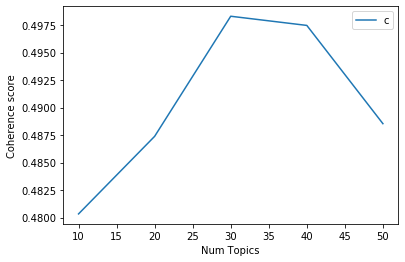

In [58]:
# Show graph

x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [59]:
num_topics = 29
start = time.time()
mallet_path = path.expanduser('~/work/jupyter_notebooks/notebooks/mallet-2.0.8/bin/mallet') # update this path
# prefix = path.expanduser('~/work/jupyter_notebooks/notebooks/mallet-dep/')
model = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=num_topics, id2word=id2word, random_seed = 1)

dur = time.time() - start

print("Time Elapsed",dur,'s')

coherence_model_ldamallet = gensim.models.CoherenceModel(model=model, texts=data_words, dictionary=id2word, coherence='c_v')
coherence_ldamallet = coherence_model_ldamallet.get_coherence()
print('\nCoherence Score: ', coherence_ldamallet, '\n\n')

coherence_ldamallet_per_topic = coherence_model_ldamallet.get_coherence_per_topic()
# Show Topics
for i in np.argsort(coherence_ldamallet_per_topic):
    print('Topic', i, '- Coherence', coherence_ldamallet_per_topic[i], '\n' ,model.print_topic(i, topn=10),'\n')

Time Elapsed 171.4823613166809 s

Coherence Score:  0.5014531100319776 


Topic 17 - Coherence 0.2675891559060667 
 0.221*"people" + 0.035*"call" + 0.035*"great" + 0.035*"give" + 0.020*"news" + 0.018*"person" + 0.015*"medium" + 0.010*"thought" + 0.009*"list" + 0.008*"fact" 

Topic 21 - Coherence 0.3884779117343577 
 0.034*"space" + 0.018*"universe" + 0.016*"object" + 0.016*"line" + 0.016*"shape" + 0.014*"star" + 0.013*"matter" + 0.013*"form" + 0.012*"theory" + 0.010*"pattern" 

Topic 26 - Coherence 0.39831993318491066 
 0.029*"war" + 0.023*"man" + 0.022*"stop" + 0.019*"back" + 0.017*"kill" + 0.015*"black" + 0.015*"face" + 0.015*"break" + 0.012*"white" + 0.011*"door" 

Topic 11 - Coherence 0.4148367145159727 
 0.052*"city" + 0.036*"car" + 0.031*"power" + 0.029*"energy" + 0.018*"street" + 0.016*"drive" + 0.014*"oil" + 0.011*"york" + 0.010*"place" + 0.010*"area" 

Topic 22 - Coherence 0.41918406508096184 
 0.033*"study" + 0.027*"level" + 0.023*"found" + 0.020*"case" + 0.019*"test" + 0.019

In [60]:
num_topics = 31
start = time.time()
mallet_path = path.expanduser('~/work/jupyter_notebooks/notebooks/mallet-2.0.8/bin/mallet') # update this path
# prefix = path.expanduser('~/work/jupyter_notebooks/notebooks/mallet-dep/')
model = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=num_topics, id2word=id2word, random_seed = 1)

dur = time.time() - start

print("Time Elapsed",dur,'s')

coherence_model_ldamallet = gensim.models.CoherenceModel(model=model, texts=data_words, dictionary=id2word, coherence='c_v')
coherence_ldamallet = coherence_model_ldamallet.get_coherence()
print('\nCoherence Score: ', coherence_ldamallet, '\n\n')

coherence_ldamallet_per_topic = coherence_model_ldamallet.get_coherence_per_topic()
# Show Topics
for i in np.argsort(coherence_ldamallet_per_topic):
    print('Topic', i, '- Coherence', coherence_ldamallet_per_topic[i], '\n' ,model.print_topic(i, topn=10),'\n')

Time Elapsed 171.5894274711609 s

Coherence Score:  0.5000164449166117 


Topic 4 - Coherence 0.4008652169319725 
 0.086*"problem" + 0.072*"question" + 0.035*"answer" + 0.028*"reason" + 0.025*"wrong" + 0.023*"big" + 0.020*"choice" + 0.019*"fact" + 0.018*"decision" + 0.018*"solution" 

Topic 15 - Coherence 0.4010065018470389 
 0.368*"people" + 0.077*"talk" + 0.046*"give" + 0.038*"person" + 0.035*"talking" + 0.020*"interest" + 0.017*"share" + 0.016*"kind" + 0.015*"conversation" + 0.014*"trust" 

Topic 20 - Coherence 0.40547144756571774 
 0.026*"stop" + 0.024*"case" + 0.018*"kill" + 0.014*"law" + 0.013*"death" + 0.011*"police" + 0.010*"break" + 0.010*"violence" + 0.009*"attack" + 0.008*"call" 

Topic 12 - Coherence 0.4087856507551109 
 0.044*"guy" + 0.033*"play" + 0.032*"game" + 0.023*"call" + 0.022*"pretty" + 0.021*"time" + 0.021*"give" + 0.020*"video" + 0.019*"turn" + 0.017*"watch" 

Topic 11 - Coherence 0.41066512507926944 
 0.055*"kind" + 0.040*"computer" + 0.029*"human" + 0.029*"mach

In [61]:
num_topics = 28
start = time.time()
mallet_path = path.expanduser('~/work/jupyter_notebooks/notebooks/mallet-2.0.8/bin/mallet') # update this path
# prefix = path.expanduser('~/work/jupyter_notebooks/notebooks/mallet-dep/')
model = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=num_topics, id2word=id2word, random_seed = 1)

dur = time.time() - start

print("Time Elapsed",dur,'s')

coherence_model_ldamallet = gensim.models.CoherenceModel(model=model, texts=data_words, dictionary=id2word, coherence='c_v')
coherence_ldamallet = coherence_model_ldamallet.get_coherence()
print('\nCoherence Score: ', coherence_ldamallet, '\n\n')

coherence_ldamallet_per_topic = coherence_model_ldamallet.get_coherence_per_topic()
# Show Topics
for i in np.argsort(coherence_ldamallet_per_topic):
    print('Topic', i, '- Coherence', coherence_ldamallet_per_topic[i], '\n' ,model.print_topic(i, topn=10),'\n')

Time Elapsed 166.78169012069702 s

Coherence Score:  0.506958970554577 


Topic 19 - Coherence 0.3604198860315275 
 0.099*"world" + 0.073*"idea" + 0.040*"great" + 0.029*"hope" + 0.028*"work" + 0.027*"create" + 0.022*"imagine" + 0.019*"art" + 0.018*"reality" + 0.018*"share" 

Topic 16 - Coherence 0.3695610642401855 
 0.028*"animal" + 0.021*"head" + 0.018*"picture" + 0.018*"face" + 0.017*"back" + 0.016*"eyes" + 0.011*"eye" + 0.010*"stick" + 0.010*"walk" + 0.010*"bird" 

Topic 15 - Coherence 0.41641590692863684 
 0.055*"move" + 0.050*"back" + 0.033*"point" + 0.032*"turn" + 0.031*"side" + 0.030*"left" + 0.029*"hand" + 0.027*"time" + 0.027*"give" + 0.017*"stop" 

Topic 10 - Coherence 0.4228266551775518 
 0.038*"building" + 0.035*"project" + 0.024*"image" + 0.024*"build" + 0.024*"piece" + 0.017*"house" + 0.016*"tree" + 0.015*"wall" + 0.013*"paper" + 0.012*"show" 

Topic 24 - Coherence 0.425770739519558 
 0.100*"change" + 0.075*"problem" + 0.050*"people" + 0.034*"future" + 0.024*"challenge" +

In [14]:
num_topics = 32
start = time.time()
mallet_path = path.expanduser('~/work/jupyter_notebooks/notebooks/mallet-2.0.8/bin/mallet') # update this path
# prefix = path.expanduser('~/work/jupyter_notebooks/notebooks/mallet-dep/')
model = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=num_topics, id2word=id2word, random_seed = 1)

dur = time.time() - start

print("Time Elapsed",dur,'s')

coherence_model_ldamallet = gensim.models.CoherenceModel(model=model, texts=data_words, dictionary=id2word, coherence='c_v')
coherence_ldamallet = coherence_model_ldamallet.get_coherence()
print('\nCoherence Score: ', coherence_ldamallet, '\n\n')

coherence_ldamallet_per_topic = coherence_model_ldamallet.get_coherence_per_topic()
# Show Topics
for i in np.argsort(coherence_ldamallet_per_topic):
    print('Topic', i, '- Coherence', coherence_ldamallet_per_topic[i], '\n' ,model.print_topic(i, topn=10),'\n')

Time Elapsed 168.03402256965637 s

Coherence Score:  0.5079436508516949 


Topic 10 - Coherence 0.34153913499417093 
 0.143*"life" + 0.058*"live" + 0.026*"living" + 0.023*"god" + 0.019*"dream" + 0.019*"place" + 0.017*"call" + 0.017*"man" + 0.013*"great" + 0.012*"journey" 

Topic 5 - Coherence 0.3444887242144478 
 0.394*"people" + 0.045*"work" + 0.041*"person" + 0.038*"give" + 0.025*"group" + 0.022*"important" + 0.019*"reason" + 0.018*"relationship" + 0.016*"matter" + 0.016*"lots" 

Topic 6 - Coherence 0.37351536436994903 
 0.062*"back" + 0.053*"move" + 0.033*"hand" + 0.022*"close" + 0.018*"eyes" + 0.017*"time" + 0.017*"hands" + 0.017*"left" + 0.016*"step" + 0.016*"point" 

Topic 1 - Coherence 0.39240209234463647 
 0.066*"love" + 0.036*"great" + 0.026*"work" + 0.023*"art" + 0.020*"create" + 0.017*"film" + 0.016*"beautiful" + 0.015*"movie" + 0.013*"artist" + 0.013*"inspire" 

Topic 4 - Coherence 0.41596058613153863 
 0.088*"problem" + 0.028*"challenge" + 0.026*"big" + 0.020*"making" + 0.

In [15]:
df_topic_sents_keywords = format_topics_sentences(ldamodel=model, corpus=corpus, texts=talk_pre_extra_keywords['transcript'].values)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']

# Show
df_dominant_topic.head(10)

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,15.0,0.0511,"world, change, talk, future, talking, hope, re...",thank much chris come stage twice extremely gr...
1,1,0.0,0.0312,"kind, idea, sort, bit, stuff, guy, interest, p...",
2,2,2.0,0.0415,"show, picture, image, side, line, left, point,...",position
3,3,0.0,0.0312,"kind, idea, sort, bit, stuff, guy, interest, p...",
4,4,29.0,0.0516,"car, run, head, back, drive, foot, fly, fast, ...",fly air force two eight years
5,5,0.0,0.0312,"kind, idea, sort, bit, stuff, guy, interest, p...",
6,6,29.0,0.0840,"car, run, head, back, drive, foot, fly, fast, ...",take shoes boot get airplane
7,7,0.0,0.0312,"kind, idea, sort, bit, stuff, guy, interest, p...",
8,8,0.0,0.0312,"kind, idea, sort, bit, stuff, guy, interest, p...",
9,9,9.0,0.0483,"story, hear, sound, play, language, words, mus...",tell one quick story illustrate like


In [39]:
'''
Coherence Score:  0.5079436508516949 


Topic 10 - Coherence 0.34153913499417093 Life/Religion
 0.143*"life" + 0.058*"live" + 0.026*"living" + 0.023*"god" + 0.019*"dream" + 0.019*"place" + 0.017*"call" + 0.017*"man" + 0.013*"great" + 0.012*"journey" 

Topic 5 - Coherence 0.3444887242144478 Human Relationship
 0.394*"people" + 0.045*"work" + 0.041*"person" + 0.038*"give" + 0.025*"group" + 0.022*"important" + 0.019*"reason" + 0.018*"relationship" + 0.016*"matter" + 0.016*"lots" 

Topic 6 - Coherence 0.37351536436994903 Physiology/Physical Activity
 0.062*"back" + 0.053*"move" + 0.033*"hand" + 0.022*"close" + 0.018*"eyes" + 0.017*"time" + 0.017*"hands" + 0.017*"left" + 0.016*"step" + 0.016*"point" 

Topic 1 - Coherence 0.39240209234463647 Art
 0.066*"love" + 0.036*"great" + 0.026*"work" + 0.023*"art" + 0.020*"create" + 0.017*"film" + 0.016*"beautiful" + 0.015*"movie" + 0.013*"artist" + 0.013*"inspire" 

Topic 4 - Coherence 0.41596058613153863 Problem Solving
 0.088*"problem" + 0.028*"challenge" + 0.026*"big" + 0.020*"making" + 0.020*"solution" + 0.020*"choice" + 0.019*"issue" + 0.018*"decision" + 0.017*"solve" + 0.016*"choose" 

Topic 25 - Coherence 0.42805412250645836 Brain/Thinking
 0.062*"brain" + 0.028*"control" + 0.017*"behavior" + 0.015*"pattern" + 0.013*"memory" + 0.013*"area" + 0.012*"system" + 0.012*"experiment" + 0.011*"blue" + 0.011*"process" 

Topic 11 - Coherence 0.43634908312442605 Literature/Research
 0.078*"question" + 0.041*"write" + 0.040*"book" + 0.038*"answer" + 0.031*"call" + 0.027*"read" + 0.026*"thought" + 0.018*"give" + 0.018*"wrong" + 0.016*"fact" 

Topic 21 - Coherence 0.4419258225392556 Internet
 0.023*"internet" + 0.022*"medium" + 0.022*"news" + 0.021*"video" + 0.021*"call" + 0.020*"network" + 0.016*"message" + 0.015*"social" + 0.014*"share" + 0.014*"free" 

Topic 28 - Coherence 0.44330177076729127 Law
 0.030*"case" + 0.015*"law" + 0.014*"protect" + 0.012*"risk" + 0.012*"police" + 0.012*"security" + 0.011*"break" + 0.010*"worry" + 0.009*"secret" + 0.009*"system" 

Topic 2 - Coherence 0.4530081856382937 Imagery
 0.081*"show" + 0.040*"picture" + 0.034*"image" + 0.030*"side" + 0.030*"line" + 0.021*"left" + 0.020*"point" + 0.019*"top" + 0.018*"back" + 0.017*"bit" 

Topic 15 - Coherence 0.453356962147451 Future
 0.138*"world" + 0.119*"change" + 0.076*"talk" + 0.041*"future" + 0.028*"talking" + 0.026*"hope" + 0.020*"reality" + 0.019*"sense" + 0.018*"share" + 0.017*"idea" 

Topic 19 - Coherence 0.4536853887976339 Science
 0.066*"human" + 0.036*"science" + 0.020*"scientist" + 0.020*"nature" + 0.020*"fact" + 0.019*"understand" + 0.017*"humans" + 0.017*"model" + 0.012*"simple" + 0.012*"knowledge" 

Topic 26 - Coherence 0.47414093454097495 War
 0.083*"woman" + 0.032*"men" + 0.031*"war" + 0.025*"man" + 0.018*"black" + 0.017*"kill" + 0.015*"white" + 0.012*"sex" + 0.012*"fight" + 0.012*"violence" 

Topic 20 - Coherence 0.4751668522626016 Feelings
 0.054*"feel" + 0.048*"experience" + 0.027*"face" + 0.026*"mind" + 0.022*"moment" + 0.021*"happy" + 0.019*"fear" + 0.019*"felt" + 0.016*"feeling" + 0.014*"truth" 

Topic 12 - Coherence 0.47894699884902786 Lifestyle
 0.076*"day" + 0.061*"time" + 0.031*"game" + 0.028*"room" + 0.026*"days" + 0.024*"week" + 0.024*"night" + 0.022*"spend" + 0.022*"hours" + 0.019*"minutes" 

Topic 0 - Coherence 0.4863348751251845 Misc
 0.103*"kind" + 0.075*"idea" + 0.050*"sort" + 0.039*"bit" + 0.031*"stuff" + 0.031*"guy" + 0.031*"interest" + 0.028*"pretty" + 0.026*"piece" + 0.026*"thinking" 

Topic 29 - Coherence 0.5013274981965737 Transport
 0.040*"car" + 0.025*"run" + 0.020*"head" + 0.019*"back" + 0.018*"drive" + 0.017*"foot" + 0.015*"fly" + 0.015*"fast" + 0.013*"running" + 0.012*"walk" 

Topic 9 - Coherence 0.5022350661595001 Music/Sounds
 0.087*"story" + 0.051*"hear" + 0.035*"sound" + 0.032*"play" + 0.028*"language" + 0.027*"words" + 0.025*"music" + 0.024*"word" + 0.020*"voice" + 0.020*"speak" 

Topic 3 - Coherence 0.5266327788315825 Architecture
 0.057*"city" + 0.042*"building" + 0.037*"build" + 0.032*"place" + 0.025*"project" + 0.024*"community" + 0.023*"design" + 0.021*"space" + 0.021*"street" + 0.018*"house" 

Topic 13 - Coherence 0.5268569138495968 History/Time
 0.170*"years" + 0.082*"time" + 0.079*"year" + 0.055*"ago" + 0.052*"long" + 0.049*"million" + 0.029*"thousand" + 0.027*"month" + 0.026*"half" + 0.025*"hundred" 

Topic 27 - Coherence 0.5294289060077668 Space
 0.038*"light" + 0.022*"space" + 0.019*"universe" + 0.017*"shape" + 0.017*"small" + 0.016*"object" + 0.015*"star" + 0.014*"size" + 0.013*"theory" + 0.012*"dark" 

Topic 23 - Coherence 0.5445556812968387 Technology
 0.061*"technology" + 0.049*"data" + 0.039*"system" + 0.038*"computer" + 0.027*"machine" + 0.025*"information" + 0.022*"design" + 0.020*"robot" + 0.019*"create" + 0.018*"build" 

Topic 24 - Coherence 0.5848110549740829 Politics
 0.031*"power" + 0.028*"society" + 0.020*"government" + 0.017*"rule" + 0.017*"political" + 0.016*"social" + 0.013*"trust" + 0.011*"movement" + 0.011*"institution" + 0.011*"citizen" 

Topic 18 - Coherence 0.5852057673525872 Nature
 0.033*"food" + 0.028*"animal" + 0.018*"plant" + 0.017*"tree" + 0.014*"species" + 0.014*"fish" + 0.014*"grow" + 0.013*"eat" + 0.012*"forest" + 0.010*"bird" 

Topic 30 - Coherence 0.5913850152461545 Statistics/Math
 0.073*"percent" + 0.038*"number" + 0.027*"level" + 0.023*"high" + 0.019*"increase" + 0.018*"population" + 0.014*"fact" + 0.014*"low" + 0.014*"average" + 0.014*"growth" 

Topic 31 - Coherence 0.5938328627670438 Biology
 0.042*"cell" + 0.041*"body" + 0.026*"cancer" + 0.015*"material" + 0.015*"gene" + 0.014*"dna" + 0.013*"blood" + 0.012*"inside" + 0.011*"structure" + 0.011*"form" 

Topic 7 - Coherence 0.6006570460559886 Education
 0.058*"school" + 0.056*"learn" + 0.040*"work" + 0.032*"student" + 0.030*"job" + 0.030*"kid" + 0.023*"education" + 0.022*"teach" + 0.022*"learning" + 0.020*"working" 

Topic 16 - Coherence 0.6196599618354366 Demography/Geography
 0.074*"country" + 0.066*"world" + 0.046*"state" + 0.027*"africa" + 0.025*"unite" + 0.022*"america" + 0.017*"india" + 0.017*"china" + 0.014*"american" + 0.014*"south" 

Topic 22 - Coherence 0.6566349939250787 Business
 0.037*"company" + 0.036*"money" + 0.033*"dollar" + 0.028*"business" + 0.025*"pay" + 0.019*"market" + 0.019*"buy" + 0.018*"product" + 0.015*"cost" + 0.013*"industry" 

Topic 14 - Coherence 0.6571428700756343 Healthcare
 0.033*"health" + 0.030*"care" + 0.028*"disease" + 0.027*"patient" + 0.021*"drug" + 0.019*"doctor" + 0.018*"heart" + 0.015*"treat" + 0.014*"medical" + 0.013*"hospital" 

Topic 17 - Coherence 0.6701498772847276 Environment
 0.041*"water" + 0.029*"planet" + 0.025*"earth" + 0.024*"energy" + 0.018*"ocean" + 0.014*"air" + 0.012*"sea" + 0.010*"surface" + 0.010*"ice" + 0.010*"carbon" 

Topic 8 - Coherence 0.671503635042303 Family
 0.075*"child" + 0.045*"family" + 0.032*"home" + 0.029*"girl" + 0.027*"mother" + 0.026*"friend" + 0.025*"kid" + 0.024*"age" + 0.024*"parent" + 0.023*"young" 
 '''

df_dominant_topic[(df_dominant_topic.Dominant_Topic == 7) & (df_dominant_topic.Topic_Perc_Contrib > 0.1)].sort_values('Topic_Perc_Contrib')[['Topic_Perc_Contrib','Keywords','Text']].values

array([[0.1001,
        'school, learn, work, student, job, kid, education, teach, learning, working',
        'right little bit people long beach classroom harvard student interest take way thinking arguing engage seriously big moral question explore cultural difference connect live video hookup student beijing mumbai cambridge massachusetts create global classroom would love'],
       [0.1001,
        'school, learn, work, student, job, kid, education, teach, learning, working',
        'first slogan going lead lead always believe school school principal principal title require lead going stay office going delegate work going afraid address anything child whether like leader know cannot anything alone assemble top notch leadership team believe possibility child together tackle small like reset every single locker combination hand every student could secure locker decorate every bulletin board building bright colorful positive message take chains front door school get lightbulb replac

In [17]:
talk_pre_extra_keywords[talk_pre_extra_keywords.transcript == 'squandering valuable resource continent valuable resource imagination film sometimes april raoul peck idris elba poise scene machete raise force crowd chop best friend fellow rwandan army officer albeit tutsi play fraser james fraser knee arms tie behind back crying sniveling pitiful sight watch ashamed want say idris chop shut idris move fraser scream stop please stop idris pause move fraser say please please stop look horror terror fraser face stops idris look fraser eyes one say saying save although would nice save lost afraid standing face death escape soiling crying say moment fraser say idris tell girlfriend love moment fraser say lost already redemption aspire']

,id,talk_id,transcript
5092,13.0,155.0,squandering valuable resource continent valuab...


In [18]:
# Group top 5 sentences under each topic
sent_topics_sorteddf_mallet = pd.DataFrame()

sent_topics_outdf_grpd = df_topic_sents_keywords.groupby('Dominant_Topic')

for i, grp in sent_topics_outdf_grpd:
    sent_topics_sorteddf_mallet = pd.concat([sent_topics_sorteddf_mallet, 
                                             grp.sort_values(['Perc_Contribution'], ascending=[0]).head(1)], 
                                            axis=0)

# Reset Index    
sent_topics_sorteddf_mallet.reset_index(drop=True, inplace=True)

# Format
sent_topics_sorteddf_mallet.columns = ['Topic_Num', "Topic_Perc_Contrib", "Keywords", "Text"]

# Show
sent_topics_sorteddf_mallet

,Topic_Num,Topic_Perc_Contrib,Keywords,Text
0,0.0,0.2733,"kind, idea, sort, bit, stuff, guy, interest, p...",lady gentleman possible possible well could gw...
1,1.0,0.2719,"love, great, work, art, create, film, beautifu...",also marry two important indian cricket cricke...
2,2.0,0.2600,"show, picture, image, side, line, left, point,...",leaning sandbag one morning much going sort sp...
3,3.0,0.4025,"city, building, build, place, project, communi...",another infill project parking lots one office...
4,4.0,0.2883,"problem, challenge, big, making, solution, cho...",fundamental problem dealing social problem cut...
5,5.0,0.2616,"people, work, person, give, group, important, ...",would test personal fudge factor initially say...
6,6.0,0.3865,"back, move, hand, close, eyes, time, hands, le...",going looking white ball going tell color also...
7,7.0,0.3505,"school, learn, work, student, job, kid, educat...",nowhere quality education system exceed qualit...
8,8.0,0.3681,"child, family, home, girl, mother, friend, kid...",thula mama thula mama thula mama thula mama mi...
9,9.0,0.3826,"story, hear, sound, play, language, words, mus...",song love song life song love song life song l...


In [19]:
# Number of Documents for Each Topic
topic_counts = df_topic_sents_keywords['Dominant_Topic'].value_counts()

# Percentage of Documents for Each Topic
topic_contribution = round(topic_counts/topic_counts.sum(), 4)

# Topic Number and Keywords
topic_num_keywords = df_topic_sents_keywords[['Dominant_Topic', 'Topic_Keywords']]

# Concatenate Column wise
df_dominant_topics = pd.concat([topic_num_keywords, topic_counts, topic_contribution], axis=1)

# Change Column names
df_dominant_topics.columns = ['Dominant_Topic', 'Topic_Keywords', 'Num_Documents', 'Perc_Documents']

# Show
df_dominant_topics

,Dominant_Topic,Topic_Keywords,Num_Documents,Perc_Documents
0.0,15.0,"world, change, talk, future, talking, hope, re...",15242.0,0.2108
1.0,0.0,"kind, idea, sort, bit, stuff, guy, interest, p...",2057.0,0.0285
2.0,2.0,"show, picture, image, side, line, left, point,...",1336.0,0.0185
3.0,0.0,"kind, idea, sort, bit, stuff, guy, interest, p...",1996.0,0.0276
4.0,29.0,"car, run, head, back, drive, foot, fly, fast, ...",1310.0,0.0181
...,...,...,...,...
72294.0,0.0,"kind, idea, sort, bit, stuff, guy, interest, p...",NaN,NaN
72295.0,8.0,"child, family, home, girl, mother, friend, kid...",NaN,NaN
72296.0,15.0,"world, change, talk, future, talking, hope, re...",NaN,NaN
72297.0,0.0,"kind, idea, sort, bit, stuff, guy, interest, p...",NaN,NaN
